#### **1. Importando Pacote e módulos necessários**

Instalação dos módulos necessários.

In [ ]:
!pip install seaborn
!pip install scikit-learn
!pip install matplotlib
!pip install aisp
!pip install pandas

In [1]:
# Importing the negative selection.
from aisp.NSA import BNSA
# Importando os demais pacotes. 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### **2. Carregar a base de dados e binarizando-os**

In [2]:
# Carrega a base de dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mushrooms = pd.read_csv(url, header=None)

# Cria nomes de colunas
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
           'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
           'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

mushrooms.columns = columns

# Converte todas as variáveis categóricas em variáveis binárias
mushrooms_binary = pd.get_dummies(mushrooms, columns=columns[1:], drop_first=True)
dados = mushrooms_binary.drop('class', axis=1).to_numpy()
classes = mushrooms['class'].replace(['e', 'p'], ['Comestível', 'Venenoso']).to_numpy()

print(f"Número de amostras: {dados.shape[0]}\nNúmero de dimensões: {dados.shape[1]}")

Número de amostras: 8124
Número de dimensões: 95


#### **4 Separação de treinamento e teste (30% para teste)**

In [3]:
# Gerando os conjuntos de treinamento e teste.
train_x, test_x, train_y, test_y = train_test_split(dados, classes, test_size=0.30)

#### **5. Validação Cruzada.**

In [4]:
accuracy_list = list()

# Model Initialization
model = BNSA(N=1000, aff_thresh=0.50, max_discards=1000)

for i in range(0, 50):
    # Dividir o conjunto de treinamento, separando 1/10 dos dados para validação.
    train_model_x, valid_x, train__model_y, valid_y = train_test_split(train_x, train_y, test_size=0.1)

    # Ajustar o modelo usando os outros 90% dos dados
    model.fit(train_model_x, train__model_y, verbose=False)

    # Calculo de acurácia para conjunto de validação: 
    prev_y = model.predict(valid_x)
    accuracy_list.append(accuracy_score(prev_y, valid_y))

# Exibir a acurácia média e seu desvio padrão
print(f"A acuracia media é: {np.average(np.array(accuracy_list)):.6f}")
print(f"Desvio padrão das acuracias: {np.std(np.array(accuracy_list)):.6f}")


A acuracia media é: 0.991037
Desvio padrão das acuracias: 0.005616


**6. Ajuste do modelo usando o conjunto de treinamento no seu total**

In [5]:
# Criando o modelo com todos os dados separados para treinamento.
model.fit(train_x, train_y)
print('Modelo Total Ajustado!')

✔ Non-self detectors for classes (Comestível, Venenoso) successfully generated:  ┇██████████┇ 2000/2000 detectors

Modelo Total Ajustado!


**7. Exibir relatório e matriz de confusão para o conjunto de teste**

A acuracia é 0.9983593109105825
              precision    recall  f1-score   support

  Comestível       1.00      1.00      1.00      1270
    Venenoso       1.00      1.00      1.00      1168

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



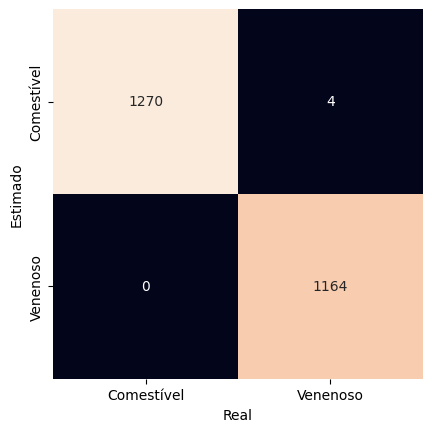

In [6]:
# Prevendo às classes com as amostras de teste.
prev_y = model.predict(test_x)
# Mostrando a acurácia das previsões para os dados reais.
print(f"A acuracia é {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))
# Gerando a matriz de confusão e plotando de forma gráfica.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=model.classes, yticklabels=model.classes)
plt.xlabel('Real')
plt.ylabel('Estimado')
plt.show()